In [1]:
import pandas as pd;
import numpy as np;
import datetime as dt;
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot

In [2]:
df = pd.read_csv('./dataset_dap/cafdapativa.csv', delimiter=';')

C:\Users\rivaldoj\AppData\Local\Temp\ipykernel_3176\2048841100.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./dataset_dap/cafdapativa.csv', delimiter=';')


In [7]:
df.shape

(2508564, 13)

In [3]:
df_paraiba = df.loc[df['UF'] == 'PB']

In [4]:
df_paraiba.shape

(136133, 13)

In [5]:
df_paraiba['DATA_EMISSAO'] = pd.to_datetime(df_paraiba['DATA_EMISSAO'])
df_paraiba.dtypes

C:\Users\rivaldoj\AppData\Local\Temp\ipykernel_3176\1891888955.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_paraiba['DATA_EMISSAO'] = pd.to_datetime(df_paraiba['DATA_EMISSAO'])
C:\Users\rivaldoj\AppData\Local\Temp\ipykernel_3176\1891888955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paraiba['DATA_EMISSAO'] = pd.to_datetime(df_paraiba['DATA_EMISSAO'])


DAP                             object
ENQUADRAMENTO                   object
CATEGORIA                       object
NOME_T1                         object
NOME_T2                         object
UF                              object
MUNICIPIO                       object
DATA_EMISSAO            datetime64[ns]
DATA_VALIDADE                   object
CPF_EMISSOR                     object
NOME_EMISSOR                    object
CNPJ_EMISSOR                     int64
RAZAO_SOCIAL_EMISSOR            object
dtype: object

In [ ]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')[['vendas', 'aumento', 'aceleracao']].mean().round()


In [16]:
daps_emitidas = df_paraiba.groupby('DATA_EMISSAO')[['DAP']].
daps_emitidas

,DAP
DATA_EMISSAO,
2021-02-08,173
2021-02-09,174
2021-02-10,120
2021-02-11,127
2021-02-12,84
...,...
2023-08-27,2
2023-08-28,52
2023-08-29,54


In [25]:
daps =  daps_emitidas.index.year.value_counts(ascending=True)

In [29]:
daps

DATA_EMISSAO
2023     84
2021    327
2022    359
Name: count, dtype: int64

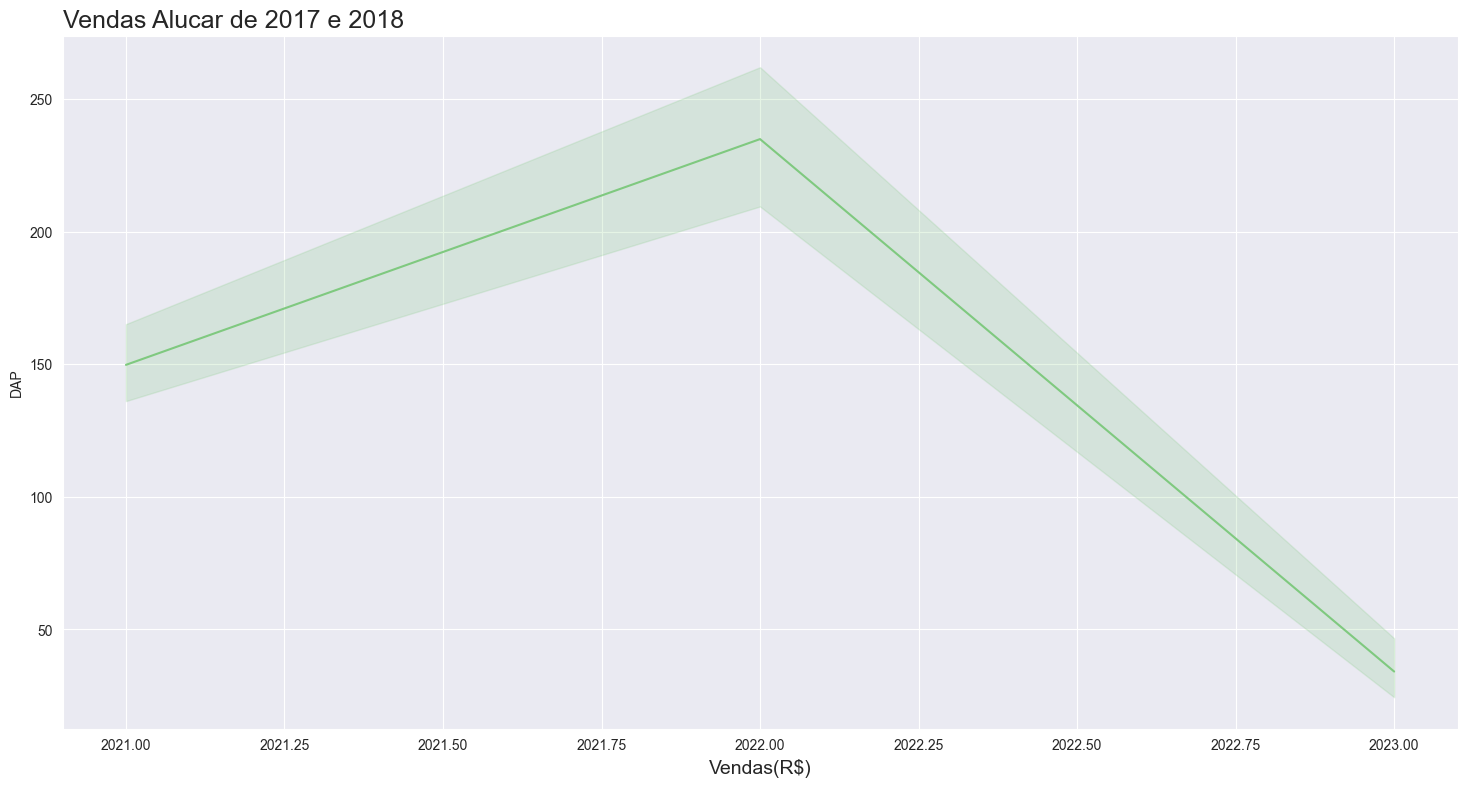

In [22]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x=daps_emitidas.index.year, y='DAP', data=daps_emitidas)
ax.figure.set_size_inches(18,9)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left',fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_xlabel('Vendas(R$)', fontsize=14)
ax = ax

In [11]:
def grafico_vendas (data):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x='DATA_EMISSAO', y='DAP', data=data)
    ax.figure.set_size_inches(12,6)
    ax.set_title('Vendas Alucar de 2017 e 2018', loc='left',fontsize=18)
    ax.set_xlabel('Tempo', fontsize=14)
    ax.set_xlabel('Vendas(R$)', fontsize=14)
    ax = ax

In [12]:
grafico_vendas(df)

KeyboardInterrupt: 

In [4]:
print(f"Os 10 maiores emissores de DAP do Brasil: '\n'{df['UF'].value_counts(ascending=False).head(10)}")

Os 10 maiores emissores de DAP do Brasil: '
'UF
BA    518351
CE    314926
PE    214328
PI    186336
MG    181547
RS    168062
MA    158201
PB    136133
PR     92127
PA     72781
Name: count, dtype: int64


In [5]:
df['CATEGORIA'].value_counts()

CATEGORIA
Demais agricultores familiares                                                      2230849
Assentado/a pelo PNRA                                                                 97559
Pescador/a                                                                            55119
Extrativista                                                                          44665
Quilombola                                                                            32278
Indígena                                                                              25457
Aquicultor/a                                                                          11171
Beneficiário/a do PNCF                                                                 9022
Silvicultor/a                                                                          2444
Name: count, dtype: int64

In [6]:
df['ENQUADRAMENTO'].value_counts()

ENQUADRAMENTO
B                       1675402
Variável                 786806
A                         41024
A/C                        5332
Name: count, dtype: int64

In [7]:
df.loc[df['UF'] == 'PB']['ENQUADRAMENTO'].value_counts(ascending=True, normalize=True)

ENQUADRAMENTO
A/C                     0.003004
A                       0.027480
Variável                0.068940
B                       0.900575
Name: proportion, dtype: float64

In [8]:
df.loc[df['UF'] == 'PB']['RAZAO_SOCIAL_EMISSOR'].value_counts(ascending=False, normalize=True).head(10).round(3)

RAZAO_SOCIAL_EMISSOR
EMPRESA PARAIBANA DE PESQUISA, EXTENSÃO RURAL E REGULARIZAÇÃO FUNDIÁRIA                                 0.712
Sindicato dos Trabalhadores na Agricultura Familiar de Zabele, Monteiro e São Sebastião do Umbuzeiro    0.014
SINDICATO DOS TRABALHADORES RURAIS DE BANANEIRAS                                                        0.009
SINDICATO DOS TRABALHADORES RURAIS DE ESPERANCA                                                         0.008
SINDICATO DOS TRABALHADORES RURAIS DE MASSARANDUBA                                                      0.007
SECRETARIA DE ESTADO DO DESENVOLVIMENTO DA AGROPECURIA E DA PESCA                                       0.007
SINDICATO DOS TRABALHADORES RURAIS DE REMIGIO                                                           0.007
SINDICATO DOS TRABALHADORES RURAIS DE SAO JOSE DOS RAMOS -PB                                            0.006
SINDICATO DOS TRABALHADORES RURAIS DE CUITE                                                        

In [9]:
df.columns

Index(['DAP', 'ENQUADRAMENTO', 'CATEGORIA', 'NOME_T1', 'NOME_T2', 'UF',
       'MUNICIPIO', 'DATA_EMISSAO', 'DATA_VALIDADE', 'CPF_EMISSOR',
       'NOME_EMISSOR', 'CNPJ_EMISSOR', 'RAZAO_SOCIAL_EMISSOR'],
      dtype='object')

In [10]:
df['DATA_EMISSAO'] = pd.to_datetime(df['DATA_EMISSAO'], format='%d/%m/%Y' )
df['DATA_VALIDADE'] = pd.to_datetime(df['DATA_VALIDADE'], format='%d/%m/%Y')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2508564 entries, 0 to 2508563
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   DAP                   object        
 1   ENQUADRAMENTO         object        
 2   CATEGORIA             object        
 3   NOME_T1               object        
 4   NOME_T2               object        
 5   UF                    object        
 6   MUNICIPIO             object        
 7   DATA_EMISSAO          datetime64[ns]
 8   DATA_VALIDADE         datetime64[ns]
 9   CPF_EMISSOR           object        
 10  NOME_EMISSOR          object        
 11  CNPJ_EMISSOR          int64         
 12  RAZAO_SOCIAL_EMISSOR  object        
dtypes: datetime64[ns](2), int64(1), object(10)
memory usage: 248.8+ MB


In [12]:
df['DATA_EMISSAO']

0         2021-11-22
1         2022-07-21
2         2021-12-21
3         2022-05-13
4         2022-01-12
             ...    
2508559   2022-08-25
2508560   2022-08-08
2508561   2022-03-25
2508562   2021-11-16
2508563   2022-03-21
Name: DATA_EMISSAO, Length: 2508564, dtype: datetime64[ns]

In [13]:
df_escolas = pd.read_csv('./dataset_escolas/tabela_lista_escolas.csv', delimiter=';')

In [14]:
df_escolas.head(1)

,Restrição de Atendimento,Escola,Código INEP,UF,Município,Localização,Localidade Diferenciada,Categoria Administrativa,Endereço,Telefone,Dependência Administrativa,Categoria Escola Privada,Conveniada Poder Público,Regulamentação pelo Conselho de Educação,Porte da Escola,Etapas e Modalidade de Ensino Oferecidas,Outras Ofertas Educacionais,Latitude,Longitude
0,ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATE...,EMEF JOAO ALVES,25000012,PB,Araruna,Urbana,A escola não está em área de localização difer...,Pública,"RUA CORONEL PEDRO TARGINO, 264 CENTRO. 58233-0...",(83) 996051166,Municipal,Não Informado,Não,Sim,Entre 501 e 1000 matrículas de escolarização,"Ensino Fundamental, Educação de Jovens Adultos","Atendimento Educacional Especializado, Ativida...",-6.531554,-35.738744


In [15]:
df_escolas['Categoria Administrativa'].value_counts(normalize=True).round(3)*100

Categoria Administrativa
Pública    81.0
Privada    19.0
Name: proportion, dtype: float64

In [22]:
print(f"{df_escolas['Dependência Administrativa'].value_counts(normalize=True).round(4)*100}")

Dependência Administrativa
Municipal    66.88
Privada      18.97
Estadual     13.60
Federal       0.55
Name: proportion, dtype: float64


In [21]:
print(f"{df_escolas[['Dependência Administrativa','Localização']].value_counts(normalize=True).round(4)*100}")

Dependência Administrativa  Localização
Municipal                   Rural          36.48
                            Urbana         30.40
Privada                     Urbana         18.86
Estadual                    Urbana         12.06
                            Rural           1.54
Federal                     Urbana          0.53
Privada                     Rural           0.11
Federal                     Rural           0.02
Name: proportion, dtype: float64


In [18]:
df_escolas.loc[df_escolas['Dependência Administrativa'] == 'Estadual']['Escola'].count()

644

In [28]:
df_escolas = pd.read_csv('./microdados_ed_basica_2020/dados/microdados_ed_basica_2020.CSV', sep=';',  encoding='latin-1')

C:\Users\rivaldoj\AppData\Local\Temp\ipykernel_8488\3613622224.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_escolas = pd.read_csv('./microdados_ed_basica_2020/dados/microdados_ed_basica_2020.CSV', sep=';',  encoding='latin-1')


In [38]:
df_escolas


,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_MESORREGIAO,CO_MESORREGIAO,...,QT_TUR_FUND_AF,QT_TUR_MED,QT_TUR_PROF,QT_TUR_PROF_TEC,QT_TUR_EJA,QT_TUR_EJA_FUND,QT_TUR_EJA_MED,QT_TUR_ESP,QT_TUR_ESP_CC,QT_TUR_ESP_CE
0,2020,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,1102,...,0,0,0,0,0,0,0,0,0,0
1,2020,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,1102,...,0,0,0,0,12,6,6,3,3,0
2,2020,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,1102,...,1,0,0,0,0,0,0,1,1,0
3,2020,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,1102,...,5,0,0,0,0,0,0,3,3,0
4,2020,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,1102,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224224,2020,Centro-Oeste,5,Distrito Federal,DF,53,Brasília,5300108,Distrito Federal,5301,...,0,0,0,0,0,0,0,0,0,0
224225,2020,Centro-Oeste,5,Distrito Federal,DF,53,Brasília,5300108,Distrito Federal,5301,...,0,0,0,0,0,0,0,5,5,0
224226,2020,Centro-Oeste,5,Distrito Federal,DF,53,Brasília,5300108,Distrito Federal,5301,...,2,4,0,0,0,0,0,1,1,0
224227,2020,Centro-Oeste,5,Distrito Federal,DF,53,Brasília,5300108,Distrito Federal,5301,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df_escolas.loc[df_escolas['SG_UF'] == 'PB'].count()

NU_ANO_CENSO       5777
NO_REGIAO          5777
CO_REGIAO          5777
NO_UF              5777
SG_UF              5777
                   ... 
QT_TUR_EJA_FUND    5777
QT_TUR_EJA_MED     5777
QT_TUR_ESP         5777
QT_TUR_ESP_CC      5777
QT_TUR_ESP_CE      5777
Length: 370, dtype: int64